# LAB EVALUATION
**AKRITI KAPOOR**

***102203679***

***3CO18***

1. installed pycaret

In [63]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

2. loaded the dataset

In [65]:
file_path = 'Fuel_cell_performance_data-Full.csv'
data = pd.read_csv(file_path)
print("Dataset Loaded Successfully")
print(data.head())

Dataset Loaded Successfully
     F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
0  52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
1  87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
2  73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
3  65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
4  39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   

    F12   F13   F14   F15  Target1  Target2  Target3  Target4  Target5  
0  2.87  1362  15.9   429    0.959    1.531     79.3     4.19    33.29  
1  2.34  5130  26.1  1819    0.728    1.690     57.2     5.19    34.50  
2  2.13  7811  16.7  1763    0.784    1.865     61.6     7.77   129.28  
3  2.91  1641  32.1   203    0.884    1.920     71.3     8.40   186.65  
4  1.93  7648  27.5   276    0.736    1.711     58.5     4.75    52.32  


3. rollno. was 102203679

thus selected target5

In [66]:
target = 'Target5'
other_targets = ['Target1', 'Target2', 'Target3', 'Target4']
data = data.drop(columns=other_targets)

print(f"Selected Target: {target}")
print("Columns after dropping other targets:")
print(data.columns)


Selected Target: Target5
Columns after dropping other targets:
Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Target5'],
      dtype='object')


4. checking the best r^2 value : here 0.7692 for lightgbm

In [70]:
print("\nChecking for Missing Values...")
print(data.isnull().sum())
data = data.dropna()

print("\nRemoving Duplicates...")
data = data.drop_duplicates()

setup(data=data, target='Target5', train_size=0.7, data_split_shuffle=False, verbose=False)

cm = compare_models()
print("\nBest Model Identified:")
print(cm)


Checking for Missing Values...
F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
Target5    0
dtype: int64

Removing Duplicates...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.9710,429.7685,20.6577,0.7692,0.3471,0.3221,1.6730
et,Extra Trees Regressor,15.2801,439.8170,20.8822,0.7658,0.3565,0.3503,0.3360
gbr,Gradient Boosting Regressor,15.4955,445.5286,21.0072,0.7605,0.3912,0.3431,0.3060
rf,Random Forest Regressor,15.8224,472.7127,21.6471,0.7483,0.3655,0.3570,0.8830
xgboost,Extreme Gradient Boosting,15.9720,487.4887,21.9859,0.7390,0.3860,0.3672,0.6290
llar,Lasso Least Angle Regression,18.0276,545.0234,23.1944,0.7153,0.5449,0.5266,0.0270
lasso,Lasso Regression,18.0276,545.0233,23.1944,0.7153,0.5449,0.5266,0.0240
br,Bayesian Ridge,18.0562,546.3207,23.2329,0.7142,0.5692,0.5297,0.0250
ridge,Ridge Regression,18.1135,545.9428,23.2344,0.7140,0.5618,0.5325,0.0270
lar,Least Angle Regression,18.1623,546.2706,23.2426,0.7138,0.5665,0.5351,0.0270


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified:
LGBMRegressor(n_jobs=-1, random_state=639)


# 5. applying various data preprocessing techniques:

In [71]:
print("\nRe-running with a different normalization method (minmax)...")
setup(data=data, target='Target5',
      normalize=True, normalize_method='minmax',
      train_size=0.7, data_split_shuffle=False, verbose=False)

cm_minmax = compare_models()
print("\nBest Model Identified with MinMax Normalization:")
print(cm_minmax)


Re-running with a different normalization method (minmax)...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.9830,430.3899,20.6477,0.7689,0.3489,0.3234,1.5670
et,Extra Trees Regressor,15.1852,438.2812,20.8398,0.7680,0.3548,0.3473,0.3600
gbr,Gradient Boosting Regressor,15.4969,445.3471,21.0014,0.7607,0.3894,0.3451,0.5280
rf,Random Forest Regressor,15.8026,476.6043,21.7401,0.7461,0.3630,0.3531,0.9110
xgboost,Extreme Gradient Boosting,15.9720,487.4887,21.9859,0.7390,0.3860,0.3672,0.4210
ridge,Ridge Regression,18.0363,546.5280,23.2393,0.7141,0.5426,0.5193,0.0290
br,Bayesian Ridge,18.0823,546.2758,23.2383,0.7140,0.5531,0.5269,0.0340
lr,Linear Regression,18.1231,546.4131,23.2445,0.7137,0.5605,0.5327,0.0350
lar,Least Angle Regression,18.1231,546.4131,23.2445,0.7137,0.5605,0.5327,0.0320
huber,Huber Regressor,17.8261,568.2535,23.6431,0.7056,0.5210,0.4783,0.0550


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with MinMax Normalization:
LGBMRegressor(n_jobs=-1, random_state=4237)


In [72]:
# Z-score normalization
print("\nSetting up PyCaret with zscore normalization...")
setup(data=data, target='Target5',
      normalize=True, normalize_method='zscore',
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_zscore = compare_models()

print("\nBest Model Identified with Z-Score Normalization:")
print(cm_zscore)


Setting up PyCaret with zscore normalization...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,15.2013,430.2554,20.6732,0.7709,0.3527,0.3470,0.7010
lightgbm,Light Gradient Boosting Machine,15.1275,436.1429,20.8121,0.7658,0.3470,0.3228,0.9220
gbr,Gradient Boosting Regressor,15.4658,444.0810,20.9714,0.7613,0.3854,0.3422,0.3280
rf,Random Forest Regressor,15.8786,475.8530,21.7268,0.7458,0.3651,0.3558,0.6750
xgboost,Extreme Gradient Boosting,15.9720,487.4887,21.9859,0.7390,0.3860,0.3672,0.4390
llar,Lasso Least Angle Regression,17.9070,545.0703,23.1708,0.7163,0.5072,0.4975,0.0550
lasso,Lasso Regression,17.9070,545.0702,23.1708,0.7163,0.5072,0.4975,0.0320
br,Bayesian Ridge,18.0822,546.2877,23.2385,0.7140,0.5529,0.5269,0.0660
ridge,Ridge Regression,18.1150,546.3738,23.2430,0.7138,0.5593,0.5316,0.0310
lar,Least Angle Regression,18.1231,546.4131,23.2445,0.7137,0.5605,0.5327,0.0560


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Z-Score Normalization:
ExtraTreesRegressor(n_jobs=-1, random_state=6951)


In [73]:
print("\nSetting up PyCaret with maxabs normalization...")
setup(data=data, target='Target5',
      normalize=True, normalize_method='maxabs',
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_maxabs = compare_models()

print("\nBest Model Identified with MaxAbs Normalization:")
print(cm_maxabs)


Setting up PyCaret with maxabs normalization...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.9710,429.7685,20.6577,0.7692,0.3471,0.3221,1.7370
et,Extra Trees Regressor,15.2008,432.3343,20.7244,0.7688,0.3540,0.3479,0.3540
gbr,Gradient Boosting Regressor,15.4955,445.5310,21.0050,0.7605,0.3903,0.3428,0.3800
rf,Random Forest Regressor,15.8359,471.1651,21.6163,0.7481,0.3646,0.3565,0.9370
xgboost,Extreme Gradient Boosting,15.9720,487.4887,21.9859,0.7390,0.3860,0.3672,0.5790
br,Bayesian Ridge,18.0955,546.2283,23.2374,0.7140,0.5516,0.5269,0.0520
ridge,Ridge Regression,18.0251,547.3367,23.2522,0.7139,0.5367,0.5124,0.0540
lr,Linear Regression,18.1231,546.4131,23.2445,0.7137,0.5605,0.5327,0.0710
lar,Least Angle Regression,18.1231,546.4131,23.2445,0.7137,0.5605,0.5327,0.0320
huber,Huber Regressor,17.8260,568.2656,23.6433,0.7056,0.5211,0.4783,0.0590


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with MaxAbs Normalization:
LGBMRegressor(n_jobs=-1, random_state=566)


In [74]:
# Robust normalization
print("\nSetting up PyCaret with robust normalization...")
setup(data=data, target='Target5',
      normalize=True, normalize_method='robust',
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_robust = compare_models()

print("\nBest Model Identified with Robust Normalization:")
print(cm_robust)


Setting up PyCaret with robust normalization...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,15.1155,430.7366,20.6812,0.7701,0.3510,0.3446,0.5940
lightgbm,Light Gradient Boosting Machine,14.9449,430.8529,20.6923,0.7675,0.3503,0.3183,1.2330
gbr,Gradient Boosting Regressor,15.5012,447.0808,21.0359,0.7600,0.3902,0.3441,0.3170
rf,Random Forest Regressor,15.7966,475.8556,21.7208,0.7463,0.3643,0.3533,0.6710
xgboost,Extreme Gradient Boosting,15.9720,487.4887,21.9859,0.7390,0.3860,0.3672,0.4190
br,Bayesian Ridge,18.0820,546.2683,23.2381,0.7140,0.5529,0.5269,0.0560
ridge,Ridge Regression,18.1002,546.3101,23.2405,0.7139,0.5559,0.5295,0.0350
lr,Linear Regression,18.1231,546.4131,23.2445,0.7137,0.5605,0.5327,0.0310
lar,Least Angle Regression,18.1231,546.4131,23.2445,0.7137,0.5605,0.5327,0.0630
llar,Lasso Least Angle Regression,17.8740,552.0509,23.2973,0.7134,0.4799,0.4781,0.0590


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Robust Normalization:
ExtraTreesRegressor(n_jobs=-1, random_state=1658)


In [75]:
print("\nSetting up PyCaret with Classic Feature Selection (20% of features)...")
setup(data=data, target='Target5',
      feature_selection=True, feature_selection_method='classic',
      n_features_to_select=0.2,
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_classic_0_2 = compare_models()
print("\nBest Model Identified with Classic Feature Selection (20% of Features):")
print(cm_classic_0_2)


Setting up PyCaret with Classic Feature Selection (20% of features)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3030
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 15
[LightGBM] [Info] Start training from score 59.058629
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,16.6876,564.5825,23.6387,0.6985,0.3774,0.3571,0.3210
rf,Random Forest Regressor,16.8482,574.2646,23.8058,0.6938,0.3762,0.3573,0.3560
gbr,Gradient Boosting Regressor,17.1682,587.2166,24.0300,0.6852,0.3947,0.3609,0.2380
lr,Linear Regression,19.5769,636.3307,25.0451,0.6669,0.5319,0.5577,0.1090
br,Bayesian Ridge,19.5689,636.3684,25.0454,0.6669,0.5297,0.5564,0.1740
lar,Least Angle Regression,19.5769,636.3307,25.0451,0.6669,0.5319,0.5577,0.1020
en,Elastic Net,19.5700,636.3468,25.0450,0.6669,0.5302,0.5566,0.1050
ridge,Ridge Regression,19.5769,636.3307,25.0451,0.6669,0.5319,0.5577,0.1010
lasso,Lasso Regression,19.5709,636.3437,25.0449,0.6669,0.5307,0.5568,0.1020
llar,Lasso Least Angle Regression,19.5709,636.3437,25.0449,0.6669,0.5307,0.5568,0.1020


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Classic Feature Selection (20% of Features):
ExtraTreesRegressor(n_jobs=-1, random_state=701)


In [76]:
print("\nSetting up PyCaret with Univariate Feature Selection (20% of features)...")
setup(data=data, target='Target5',
      feature_selection=True, feature_selection_method='univariate',
      n_features_to_select=0.2,
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_univariate_0_2 = compare_models()
print("\nBest Model Identified with Univariate Feature Selection (20% of Features):")
print(cm_univariate_0_2)


Setting up PyCaret with Univariate Feature Selection (20% of features)...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,16.6495,561.9099,23.5898,0.6994,0.3775,0.3556,0.1980
rf,Random Forest Regressor,17.0090,587.2539,24.0848,0.6857,0.3792,0.3608,0.2860
gbr,Gradient Boosting Regressor,17.1668,586.6051,24.0193,0.6852,0.3990,0.3609,0.1320
lr,Linear Regression,19.5769,636.3307,25.0451,0.6669,0.5319,0.5577,0.0310
br,Bayesian Ridge,19.5689,636.3684,25.0454,0.6669,0.5297,0.5564,0.0510
lar,Least Angle Regression,19.5769,636.3307,25.0451,0.6669,0.5319,0.5577,0.0330
en,Elastic Net,19.5700,636.3468,25.0450,0.6669,0.5302,0.5566,0.0290
ridge,Ridge Regression,19.5769,636.3307,25.0451,0.6669,0.5319,0.5577,0.0320
lasso,Lasso Regression,19.5709,636.3437,25.0449,0.6669,0.5307,0.5568,0.0310
llar,Lasso Least Angle Regression,19.5709,636.3437,25.0449,0.6669,0.5307,0.5568,0.0340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Univariate Feature Selection (20% of Features):
ExtraTreesRegressor(n_jobs=-1, random_state=7706)


In [78]:
print("\nSetting up PyCaret with Outlier Removal using Isolation Forest...")
setup(data=data, target='Target5',
      remove_outliers=True, outliers_method="iforest", outliers_threshold=0.05,
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_iforest = compare_models()
print("\nBest Model Identified with Outlier Removal using Isolation Forest:")
print(cm_iforest)


Setting up PyCaret with Outlier Removal using Isolation Forest...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,15.1248,435.2736,20.7717,0.7691,0.3559,0.3502,0.5380
gbr,Gradient Boosting Regressor,15.6943,452.5303,21.1838,0.7578,0.3986,0.3553,0.4600
lightgbm,Light Gradient Boosting Machine,15.5197,452.7204,21.2026,0.7538,0.3642,0.3391,1.1790
rf,Random Forest Regressor,15.8858,477.6358,21.7824,0.7446,0.3699,0.3634,1.0470
xgboost,Extreme Gradient Boosting,16.2422,511.2144,22.5359,0.7221,0.3883,0.3729,0.5610
llar,Lasso Least Angle Regression,18.0625,547.3211,23.2467,0.7139,0.5526,0.5320,0.1910
lasso,Lasso Regression,18.0625,547.3210,23.2467,0.7139,0.5526,0.5320,0.3440
ridge,Ridge Regression,18.1638,547.6341,23.2742,0.7128,0.5608,0.5373,0.3300
lr,Linear Regression,18.1739,548.0253,23.2826,0.7125,0.5579,0.5375,0.1960
br,Bayesian Ridge,18.1226,550.1165,23.3170,0.7120,0.5672,0.5364,0.3410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Outlier Removal using Isolation Forest:
ExtraTreesRegressor(n_jobs=-1, random_state=8938)


In [79]:
print("\nSetting up PyCaret with Outlier Removal using Elliptic Envelope (ee)...")
setup(data=data, target='Target5',
      remove_outliers=True, outliers_method="ee", outliers_threshold=0.05,
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_ee = compare_models()
print("\nBest Model Identified with Outlier Removal using Elliptic Envelope (ee):")
print(cm_ee)


Setting up PyCaret with Outlier Removal using Elliptic Envelope (ee)...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,15.3065,442.1411,20.9537,0.7639,0.3573,0.3524,1.2430
gbr,Gradient Boosting Regressor,15.7711,449.1796,21.0907,0.7609,0.3933,0.3583,0.9570
lightgbm,Light Gradient Boosting Machine,15.4180,450.6058,21.1563,0.7574,0.3505,0.3301,1.3440
rf,Random Forest Regressor,15.9095,469.1563,21.5597,0.7498,0.3696,0.3648,1.5400
llar,Lasso Least Angle Regression,18.0409,548.7955,23.2697,0.7136,0.5536,0.5270,0.7430
xgboost,Extreme Gradient Boosting,16.5097,529.2866,22.9625,0.7136,0.3886,0.3703,1.2540
lasso,Lasso Regression,18.0409,548.7955,23.2697,0.7136,0.5536,0.5270,0.9200
ridge,Ridge Regression,18.1356,548.2994,23.2790,0.7131,0.5632,0.5319,0.7660
lr,Linear Regression,18.1444,548.7580,23.2889,0.7128,0.5614,0.5320,0.6990
br,Bayesian Ridge,18.1292,552.9238,23.3681,0.7110,0.5579,0.5329,0.6870


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Outlier Removal using Elliptic Envelope (ee):
ExtraTreesRegressor(n_jobs=-1, random_state=1192)


In [80]:
print("\nSetting up PyCaret with Outlier Removal using Local Outlier Factor (lof)...")
setup(data=data, target='Target5',
      remove_outliers=True, outliers_method="lof", outliers_threshold=0.05,
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_lof = compare_models()
print("\nBest Model Identified with Outlier Removal using Local Outlier Factor (lof):")
print(cm_lof)


Setting up PyCaret with Outlier Removal using Local Outlier Factor (lof)...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15.7220,447.6089,21.0469,0.7599,0.4014,0.3539,0.5060
lightgbm,Light Gradient Boosting Machine,15.2688,453.1359,21.1982,0.7564,0.3658,0.3314,0.6880
et,Extra Trees Regressor,15.6586,461.8259,21.3915,0.7550,0.3594,0.3547,0.3340
rf,Random Forest Regressor,16.1379,490.2617,22.0425,0.7403,0.3718,0.3645,0.7440
xgboost,Extreme Gradient Boosting,16.7009,521.5453,22.7821,0.7190,0.3957,0.3836,0.3740
llar,Lasso Least Angle Regression,17.9824,545.4021,23.1963,0.7155,0.5535,0.5229,0.0330
lasso,Lasso Regression,17.9824,545.4021,23.1963,0.7155,0.5535,0.5229,0.0310
ridge,Ridge Regression,18.0826,546.7378,23.2422,0.7141,0.5632,0.5290,0.0310
br,Bayesian Ridge,18.0407,547.7699,23.2540,0.7139,0.5544,0.5260,0.0370
lr,Linear Regression,18.0914,547.2818,23.2540,0.7138,0.5640,0.5293,0.0320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Outlier Removal using Local Outlier Factor (lof):
GradientBoostingRegressor(random_state=207)


In [81]:
print("\nSetting up PyCaret with Yeo-Johnson Transformation...")
setup(data=data, target='Target5',
      transformation=True, transformation_method='yeo-johnson',
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_yeo_johnson = compare_models()
print("\nBest Model Identified with Yeo-Johnson Transformation:")
print(cm_yeo_johnson)


Setting up PyCaret with Yeo-Johnson Transformation...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.9083,427.6577,20.6022,0.7704,0.3464,0.3217,0.4840
et,Extra Trees Regressor,15.1868,434.1589,20.7377,0.7701,0.3525,0.3462,0.3960
gbr,Gradient Boosting Regressor,15.4398,443.3701,20.9560,0.7615,0.3841,0.3424,0.4310
rf,Random Forest Regressor,15.8070,475.3371,21.7022,0.7469,0.3613,0.3514,0.9680
xgboost,Extreme Gradient Boosting,15.9720,487.4887,21.9859,0.7390,0.3860,0.3672,0.5380
llar,Lasso Least Angle Regression,17.7953,534.4941,22.9527,0.7217,0.5559,0.5326,0.1240
lasso,Lasso Regression,17.7953,534.4941,22.9527,0.7217,0.5559,0.5326,0.0660
br,Bayesian Ridge,17.8474,534.7832,22.9742,0.7210,0.5641,0.5386,0.0680
ridge,Ridge Regression,17.9288,535.8293,23.0060,0.7201,0.5583,0.5426,0.0690
lr,Linear Regression,17.9402,536.4064,23.0186,0.7197,0.5589,0.5430,0.0740


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Yeo-Johnson Transformation:
LGBMRegressor(n_jobs=-1, random_state=950)


In [82]:
print("\nSetting up PyCaret with PCA (Linear Method)...")
setup(data=data, target='Target5',
      pca=True, pca_method='linear',
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_pca_linear = compare_models()

print("\nBest Model Identified with PCA (Linear Method):")
print(cm_pca_linear)


Setting up PyCaret with PCA (Linear Method)...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.6702,418.4402,20.3337,0.7768,0.3404,0.3136,0.7570
et,Extra Trees Regressor,15.0960,438.2129,20.8472,0.7675,0.3473,0.3386,0.3890
gbr,Gradient Boosting Regressor,15.3667,453.8212,21.1112,0.7610,0.3767,0.3317,0.3660
rf,Random Forest Regressor,15.7678,472.3082,21.6552,0.7473,0.3633,0.3530,0.8790
xgboost,Extreme Gradient Boosting,16.1266,503.7921,22.3600,0.7277,0.3776,0.3622,0.6780
llar,Lasso Least Angle Regression,18.0079,543.4918,23.1658,0.7160,0.5461,0.5262,0.0330
lasso,Lasso Regression,18.0079,543.4918,23.1658,0.7160,0.5461,0.5262,0.0510
br,Bayesian Ridge,18.0562,546.3207,23.2329,0.7142,0.5692,0.5297,0.0310
ridge,Ridge Regression,18.1135,545.9428,23.2344,0.7140,0.5618,0.5325,0.0500
lar,Least Angle Regression,18.1231,546.4131,23.2445,0.7137,0.5605,0.5327,0.0580


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with PCA (Linear Method):
LGBMRegressor(n_jobs=-1, random_state=2158)


In [85]:
print("\nSetting up PyCaret with PCA (Incremental Method)...")
setup(data=data, target='Target5',
      pca=True, pca_method='incremental',
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_pca_incremental = compare_models()
print("\nBest Model Identified with PCA (Incremental Method):")
print(cm_pca_incremental)


Setting up PyCaret with PCA (Incremental Method)...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.9688,437.1986,20.7898,0.7669,0.3415,0.3152,0.9360
et,Extra Trees Regressor,15.1773,439.4604,20.8787,0.7663,0.3503,0.3420,0.3700
gbr,Gradient Boosting Regressor,15.3685,455.3492,21.1431,0.7603,0.3738,0.3305,0.6770
rf,Random Forest Regressor,15.8802,479.0114,21.8104,0.7430,0.3665,0.3559,1.1900
xgboost,Extreme Gradient Boosting,15.8049,485.4629,21.9087,0.7403,0.3827,0.3648,0.4290
llar,Lasso Least Angle Regression,18.0079,543.4918,23.1658,0.7160,0.5461,0.5262,0.0400
lasso,Lasso Regression,18.0079,543.4918,23.1658,0.7160,0.5461,0.5262,0.0610
br,Bayesian Ridge,18.0562,546.3207,23.2329,0.7142,0.5692,0.5297,0.0620
ridge,Ridge Regression,18.1135,545.9428,23.2344,0.7140,0.5618,0.5325,0.0620
lar,Least Angle Regression,18.1231,546.4131,23.2445,0.7137,0.5605,0.5327,0.0330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with PCA (Incremental Method):
LGBMRegressor(n_jobs=-1, random_state=1461)


In [86]:
# Applying Outlier Removal with Z-score Normalization
print("\nSetting up PyCaret with Outlier Removal and Z-score Normalization...")
setup(data=data, target='Target5',
      remove_outliers=True, outliers_threshold=0.05,
      normalize=True, normalize_method='zscore',
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_outliers_zscore = compare_models()

print("\nBest Model Identified with Outlier Removal and Z-score Normalization:")
print(cm_outliers_zscore)


Setting up PyCaret with Outlier Removal and Z-score Normalization...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,15.3598,456.2171,21.2808,0.7564,0.3503,0.3264,1.4560
et,Extra Trees Regressor,15.4947,461.9175,21.3961,0.7548,0.3605,0.3540,0.4880
gbr,Gradient Boosting Regressor,15.9157,463.8884,21.4313,0.7521,0.3998,0.3534,0.7790
rf,Random Forest Regressor,16.1479,490.1062,22.0559,0.7379,0.3704,0.3643,1.0570
lasso,Lasso Regression,17.9001,544.9632,23.1701,0.7164,0.5100,0.4973,0.1910
llar,Lasso Least Angle Regression,17.9001,544.9632,23.1701,0.7164,0.5100,0.4973,0.1930
br,Bayesian Ridge,18.0940,547.2276,23.2577,0.7136,0.5695,0.5270,0.1950
ridge,Ridge Regression,18.1237,547.2693,23.2613,0.7135,0.5657,0.5316,0.3230
lr,Linear Regression,18.1313,547.3011,23.2626,0.7134,0.5652,0.5328,0.1940
lar,Least Angle Regression,18.1313,547.3011,23.2626,0.7134,0.5652,0.5328,0.1960


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Outlier Removal and Z-score Normalization:
LGBMRegressor(n_jobs=-1, random_state=4739)


In [87]:
# Applying Outlier Removal, Z-score Normalization, and Transformation
print("\nSetting up PyCaret with Outlier Removal, Z-score Normalization, and Yeo-Johnson Transformation...")
setup(data=data, target='Target5',
      remove_outliers=True, outliers_threshold=0.05,
      normalize=True, normalize_method='zscore',
      transformation=True, transformation_method='yeo-johnson',
      train_size=0.7, data_split_shuffle=False, verbose=False)
cm_outliers_zscore_yeojohnson = compare_models()

print("\nBest Model Identified with Outlier Removal, Z-score Normalization, and Yeo-Johnson Transformation:")
print(cm_outliers_zscore_yeojohnson)


Setting up PyCaret with Outlier Removal, Z-score Normalization, and Yeo-Johnson Transformation...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,15.3061,435.0559,20.7971,0.7676,0.3570,0.3527,0.5470
gbr,Gradient Boosting Regressor,15.8391,460.7306,21.3564,0.7539,0.3904,0.3553,0.6590
lightgbm,Light Gradient Boosting Machine,15.5591,463.0128,21.4441,0.7503,0.3595,0.3375,1.5330
rf,Random Forest Regressor,16.0086,481.7797,21.8588,0.7423,0.3730,0.3673,1.1150
xgboost,Extreme Gradient Boosting,16.3826,498.5243,22.2618,0.7324,0.3904,0.3753,0.5630
llar,Lasso Least Angle Regression,17.6557,533.4633,22.9091,0.7230,0.5099,0.5028,0.2320
lasso,Lasso Regression,17.6557,533.4631,22.9091,0.7230,0.5099,0.5028,0.2330
br,Bayesian Ridge,17.8944,535.8711,23.0030,0.7200,0.5594,0.5349,0.2270
lar,Least Angle Regression,17.9301,536.0356,23.0099,0.7198,0.5628,0.5413,0.4170
ridge,Ridge Regression,17.9229,535.9886,23.0083,0.7198,0.5630,0.5400,0.2270


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Identified with Outlier Removal, Z-score Normalization, and Yeo-Johnson Transformation:
ExtraTreesRegressor(n_jobs=-1, random_state=1118)


6. after applying data pre processing steps now applying different models on dataset and choosing the one which has max r^2 value:

In [88]:
setup(data=data, target='Target5', train_size=0.7, data_split_shuffle=False, verbose=False)

models_to_try = ['rf', 'ada', 'br', 'dt', 'en', 'et', 'gbr', 'huber', 'knn', 'llar', 'lasso', 'lar', 'lightgbm', 'lr', 'omp', 'par', 'ridge']
r2_scores = {}

for model in models_to_try:
    print(f"\nTraining model: {model}")
    current_model = create_model(model)

    evaluate_model(current_model)
    model_performance = pull()
    r2_scores[model] = model_performance['R2'].iloc[0]

best_model_name = max(r2_scores, key=r2_scores.get)
best_r2_value = r2_scores[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best R2 Value: {best_r2_value}")


Training model: rf


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.6515,529.8056,23.0175,0.7802,0.3654,0.3444
1,15.3581,510.6776,22.5982,0.7705,0.3339,0.3123
2,18.1759,551.0773,23.4750,0.7669,0.3657,0.3635
3,14.2151,316.7105,17.7964,0.8291,0.3988,0.4245
4,16.1296,510.7657,22.6001,0.7573,0.3424,0.3320
5,13.3302,337.5545,18.3727,0.7047,0.3165,0.2809
6,16.8717,532.4314,23.0745,0.7241,0.3719,0.3467
7,14.4662,431.3338,20.7686,0.7130,0.3637,0.3336
8,17.1934,520.7210,22.8193,0.7603,0.3808,0.3891


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: ada


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22.0275,718.7857,26.8102,0.7017,0.6158,0.8055
1,21.4114,701.3586,26.4832,0.6848,0.5798,0.7190
2,24.3366,854.6607,29.2346,0.6385,0.5386,0.6430
3,20.5985,555.2434,23.5636,0.7004,0.6729,0.9107
4,22.3405,731.2435,27.0415,0.6525,0.5781,0.7116
5,20.1171,553.5965,23.5286,0.5157,0.5399,0.6444
6,23.5487,818.1683,28.6036,0.5761,0.5323,0.6184
7,20.1428,555.1894,23.5625,0.6305,0.5933,0.7642
8,26.1625,923.9605,30.3967,0.5747,0.6840,0.9198


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: br


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.0164,722.3256,26.8761,0.7003,0.6983,0.5891
1,17.8875,580.1968,24.0873,0.7392,0.5888,0.5533
2,19.8495,706.3244,26.5768,0.7012,0.4830,0.4705
3,18.8599,499.3144,22.3453,0.7306,0.6137,0.7120
4,19.4260,576.6766,24.0141,0.7259,0.4501,0.5434
5,15.2700,353.7419,18.8080,0.6905,0.6206,0.3909
6,18.6851,615.5304,24.8099,0.6811,0.5583,0.4776
7,15.1842,383.5214,19.5837,0.7448,0.5655,0.4568
8,18.3508,566.4419,23.8000,0.7393,0.5242,0.5414


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: dt


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.2374,785.9244,28.0343,0.6739,0.4898,0.4181
1,25.1351,1353.2567,36.7866,0.3917,0.5080,0.4471
2,24.3424,993.6580,31.5223,0.5797,0.5220,0.4788
3,25.1201,1186.7076,34.4486,0.3597,0.5768,0.6257
4,22.8123,1025.3756,32.0215,0.5127,0.5236,0.4968
5,19.0700,855.2407,29.2445,0.2518,0.4721,0.4222
6,22.7964,933.7524,30.5574,0.5162,0.5518,0.4855
7,21.5447,774.5165,27.8301,0.4846,0.5136,0.4799
8,21.5124,931.0951,30.5139,0.5715,0.5094,0.4909


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: en


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.7014,755.6905,27.4898,0.6864,0.5587,0.5627
1,18.1658,603.2153,24.5604,0.7289,0.5100,0.5612
2,20.2563,731.9991,27.0555,0.6904,0.4765,0.4680
3,18.6795,502.0545,22.4066,0.7291,0.5654,0.6929
4,19.4286,574.7388,23.9737,0.7269,0.5461,0.5508
5,15.1943,360.0801,18.9758,0.6850,0.5314,0.3827
6,19.4882,666.9885,25.8261,0.6544,0.5019,0.5042
7,15.7159,392.4379,19.8100,0.7388,0.5025,0.4763
8,18.8109,601.3261,24.5220,0.7232,0.5723,0.5572


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: et


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.3298,490.3046,22.1428,0.7965,0.3449,0.3317
1,14.7828,460.6600,21.4630,0.7929,0.3153,0.3054
2,16.3428,498.9058,22.3362,0.7890,0.3376,0.3255
3,14.2656,293.9861,17.1460,0.8414,0.3938,0.4283
4,15.7006,514.1225,22.6743,0.7557,0.3638,0.3506
5,13.7525,340.6950,18.4579,0.7019,0.3245,0.3003
6,16.5080,487.5481,22.0805,0.7474,0.3472,0.3301
7,13.0815,372.8861,19.3103,0.7519,0.3414,0.3110
8,16.9125,501.0629,22.3844,0.7694,0.3793,0.3893


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: gbr


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.2938,415.6303,20.3870,0.8275,0.4734,0.3525
1,14.4097,418.9609,20.4685,0.8117,0.3521,0.2966
2,17.0622,546.6267,23.3800,0.7688,0.3096,0.2949
3,13.2841,285.3786,16.8932,0.8460,0.3785,0.3719
4,15.8230,526.8138,22.9524,0.7496,0.3547,0.3158
5,15.2118,399.5039,19.9876,0.6505,0.3524,0.3134
6,17.1000,496.5922,22.2843,0.7427,0.3736,0.3477
7,13.7295,377.3701,19.4260,0.7489,0.3732,0.3121
8,17.8119,565.0931,23.7717,0.7399,0.4622,0.4090


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: huber


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.2367,898.3664,29.9728,0.6272,0.5018,0.5040
1,18.0009,718.9676,26.8136,0.6768,0.4782,0.4690
2,21.0966,901.6878,30.0281,0.6186,0.4841,0.4034
3,18.9746,525.5570,22.9250,0.7164,0.4929,0.6410
4,19.5382,634.5129,25.1895,0.6984,0.5042,0.5000
5,15.4616,374.4548,19.3508,0.6724,0.5713,0.3684
6,20.6773,759.0062,27.5501,0.6068,0.4859,0.4757
7,15.0160,401.2883,20.0322,0.7330,0.4410,0.4470
8,20.0065,742.3615,27.2463,0.6583,0.5142,0.5251


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: knn


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38.0529,2366.7419,48.6492,0.0179,0.8468,1.2058
1,34.0687,2040.9016,45.1763,0.0827,0.8332,1.1849
2,35.4785,2286.0762,47.8129,0.0330,0.7022,0.7992
3,36.2142,1962.1344,44.2960,-0.0587,0.9208,1.4250
4,35.0730,2189.3577,46.7906,-0.0405,0.8190,1.1369
5,29.0397,1356.4298,36.8297,-0.1867,0.7558,1.0556
6,32.6371,1767.0994,42.0369,0.0844,0.7107,0.8443
7,31.1462,1549.5776,39.3647,-0.0312,0.7786,1.1019
8,37.6900,2251.7217,47.4523,-0.0364,0.8790,1.2321


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: llar


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.0510,727.9490,26.9805,0.6979,0.6863,0.5917
1,17.8051,572.4818,23.9266,0.7427,0.5838,0.5379
2,19.9571,713.7159,26.7155,0.6981,0.4896,0.4806
3,18.5838,488.6344,22.1051,0.7364,0.5504,0.6892
4,19.2361,569.4316,23.8628,0.7294,0.4418,0.5328
5,15.2589,351.5966,18.7509,0.6924,0.5659,0.3844
6,18.8292,621.2182,24.9242,0.6781,0.5230,0.4808
7,15.1145,377.4144,19.4272,0.7488,0.5275,0.4647
8,18.5462,577.6670,24.0347,0.7341,0.5360,0.5494


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: lasso


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.0510,727.9489,26.9805,0.6979,0.6863,0.5917
1,17.8051,572.4817,23.9266,0.7427,0.5838,0.5379
2,19.9571,713.7161,26.7155,0.6981,0.4896,0.4806
3,18.5838,488.6343,22.1051,0.7364,0.5504,0.6892
4,19.2361,569.4317,23.8628,0.7294,0.4418,0.5328
5,15.2589,351.5966,18.7509,0.6924,0.5659,0.3844
6,18.8292,621.2181,24.9242,0.6781,0.5230,0.4808
7,15.1145,377.4143,19.4272,0.7488,0.5275,0.4647
8,18.5462,577.6670,24.0347,0.7341,0.5360,0.5494


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: lar


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.3991,719.8443,26.8299,0.7013,0.6904,0.6148
1,17.9499,581.7279,24.1190,0.7385,0.4797,0.5540
2,20.0775,707.4094,26.5972,0.7008,0.5180,0.4839
3,18.9881,516.4762,22.7261,0.7213,0.7274,0.7240
4,19.5736,584.2653,24.1716,0.7223,0.4432,0.5470
5,15.5531,360.1346,18.9772,0.6849,0.5848,0.4040
6,18.3817,577.4455,24.0301,0.7008,0.5493,0.4602
7,15.1319,387.2195,19.6779,0.7423,0.5805,0.4568
8,18.3281,562.4834,23.7167,0.7411,0.5378,0.5469


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: lightgbm


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.1537,411.8679,20.2945,0.8291,0.3372,0.3059
1,14.3754,435.1350,20.8599,0.8044,0.3125,0.2847
2,15.9016,508.4346,22.5485,0.7849,0.3233,0.3030
3,13.1428,301.4409,17.3621,0.8374,0.3747,0.3728
4,14.5845,441.5373,21.0128,0.7902,0.3352,0.2874
5,13.5519,326.9405,18.0815,0.7140,0.3237,0.2894
6,16.9550,504.7279,22.4661,0.7385,0.3751,0.3371
7,14.1542,411.4827,20.2850,0.7262,0.3389,0.2911
8,17.6337,529.1792,23.0039,0.7564,0.3537,0.3499


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: lr


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.3541,719.7225,26.8276,0.7014,0.6864,0.6114
1,17.9353,581.1674,24.1074,0.7388,0.4824,0.5532
2,20.0297,706.7796,26.5853,0.7010,0.5053,0.4808
3,18.9294,510.0744,22.5848,0.7248,0.6727,0.7191
4,19.4794,585.3050,24.1931,0.7218,0.4479,0.5410
5,15.5531,360.1346,18.9772,0.6849,0.5848,0.4040
6,18.3803,591.6834,24.3245,0.6934,0.5696,0.4654
7,15.1319,387.2195,19.6779,0.7423,0.5805,0.4568
8,18.1979,556.3451,23.5870,0.7439,0.5218,0.5360


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: omp


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.8794,2426.4264,49.2588,-0.0068,0.8957,1.3849
1,34.7754,2251.2775,47.4476,-0.0119,0.8527,1.2056
2,37.8510,2446.5174,49.4623,-0.0349,0.7719,0.9631
3,36.4090,1871.9315,43.2658,-0.0100,0.9437,1.5578
4,28.5872,1397.1347,37.3783,0.3360,0.6184,0.7321
5,28.9756,1209.1760,34.7732,-0.0579,0.7474,1.0022
6,34.6761,1943.0866,44.0805,-0.0067,0.7264,0.8750
7,32.1557,1500.7761,38.7399,0.0013,0.8136,1.2595
8,38.5683,2181.1804,46.7031,-0.0039,0.9187,1.3987


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: par


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.9007,1218.9096,34.9129,0.4942,0.6720,0.5408
1,34.6100,1785.2078,42.2517,0.1976,0.7573,1.0942
2,63.1645,5645.8389,75.1388,-1.3882,1.3519,1.3423
3,28.5139,1159.2456,34.0477,0.3745,0.7827,1.0304
4,26.9536,1166.0728,34.1478,0.4458,0.5901,0.7045
5,21.9293,794.6605,28.1897,0.3048,0.6203,0.6919
6,26.0130,1240.3286,35.2183,0.3574,0.5721,0.5614
7,146.7009,31432.5099,177.2922,-19.9174,1.6187,5.1717
8,179.0576,37907.5954,194.6987,-16.4474,1.5986,6.2293


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Training model: ridge


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.3317,718.6735,26.8081,0.7018,0.6791,0.6104
1,17.9249,580.5010,24.0936,0.7391,0.4844,0.5526
2,20.0162,706.1600,26.5737,0.7013,0.5065,0.4807
3,18.9286,509.2588,22.5668,0.7252,0.6721,0.7191
4,19.4789,585.1155,24.1892,0.7219,0.4479,0.5411
5,15.5436,359.8043,18.9685,0.6852,0.5840,0.4037
6,18.3830,592.1186,24.3335,0.6932,0.5693,0.4656
7,15.1226,387.1164,19.6753,0.7424,0.5886,0.4566
8,18.2020,556.5646,23.5916,0.7438,0.5228,0.5362


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Best Model: lightgbm
Best R2 Value: 0.8291


# **As best model for my dataset is lightgbm with r^2 value: 0.8291**

thus plotting values stats for it

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.1537,411.8679,20.2945,0.8291,0.3372,0.3059
1,14.3754,435.1350,20.8599,0.8044,0.3125,0.2847
2,15.9016,508.4346,22.5485,0.7849,0.3233,0.3030
3,13.1428,301.4409,17.3621,0.8374,0.3747,0.3728
4,14.5845,441.5373,21.0128,0.7902,0.3352,0.2874
5,13.5519,326.9405,18.0815,0.7140,0.3237,0.2894
6,16.9550,504.7279,22.4661,0.7385,0.3751,0.3371
7,14.1542,411.4827,20.2850,0.7262,0.3389,0.2911
8,17.6337,529.1792,23.0039,0.7564,0.3537,0.3499


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

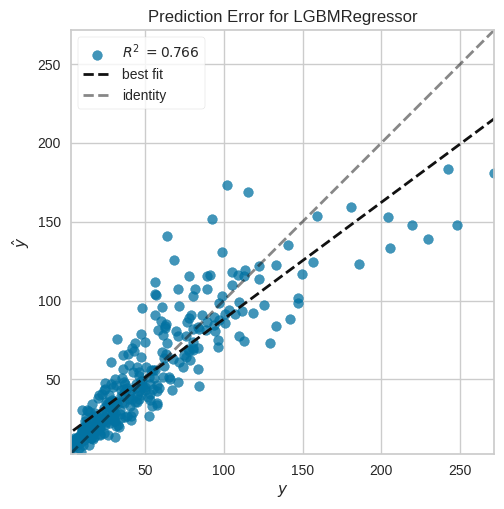

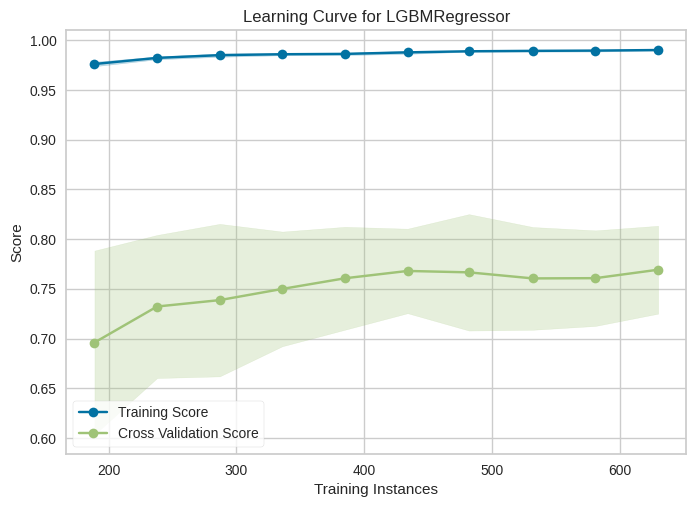

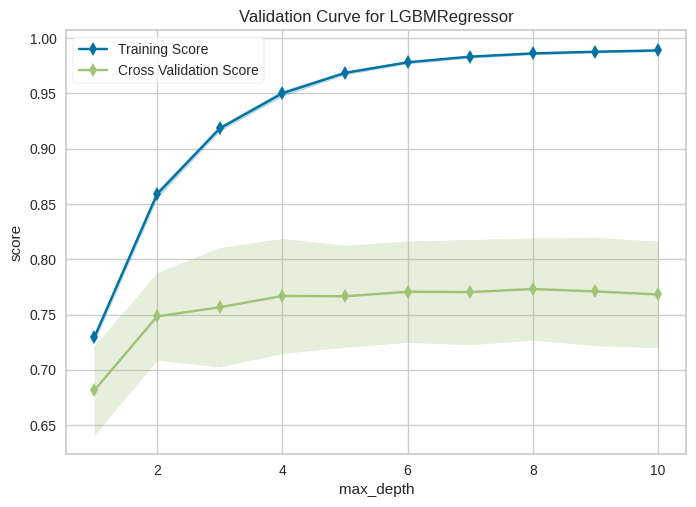

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


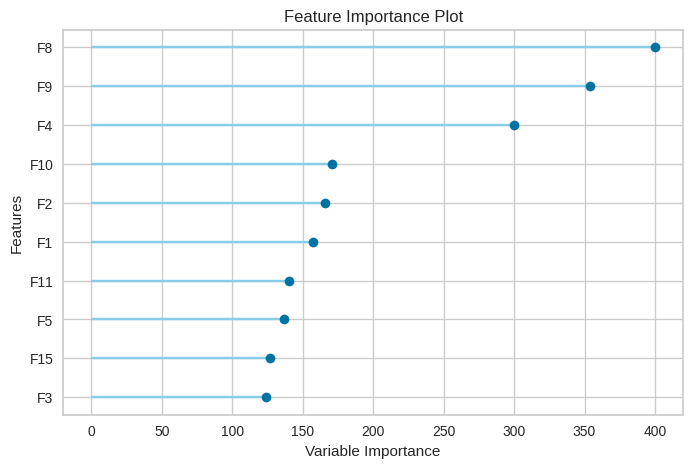

In [89]:
best_model = create_model('lightgbm')

plot_model(best_model, plot='error')

plot_model(best_model, plot='learning')

plot_model(best_model, plot='vc')

plot_model(best_model, plot='parameter')

plot_model(best_model, plot='feature')